## Business Understanding

* Main Goal: Predicting whether or not the patients have diabetes
* Objective: To build a model based on Decision Tree algorithm


In [3]:
# Loading needed libraries
import pandas as pd #import pandas to read the data into data frame 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**You can download the data from the link below** [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)


In [4]:
#reading the dataset
#adding the name of the columns
#header = 0 means the header's row index will be 0

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

#to check the differences with the above code

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Modelling

In [6]:
#split dataset in independent variables and dependent (target) feature
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # independent variable
y = pima.label # dependent variable


In [7]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 

# 70% training and 30% testing
# random state = 4, means it will be randomly choosing 70% training and 30% testing four times.

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier() #clf stands for classifier

# Train Decision Tree Classifer
# Fit function adjusts weights according to data values so that better accuracy can be achieved.
clf = clf.fit(X_train,y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [9]:
# Checking the accuracy by comparing the predicted result to the actual result
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.70995670995671


     |████████████████████████████████| 5.4 MB 5.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


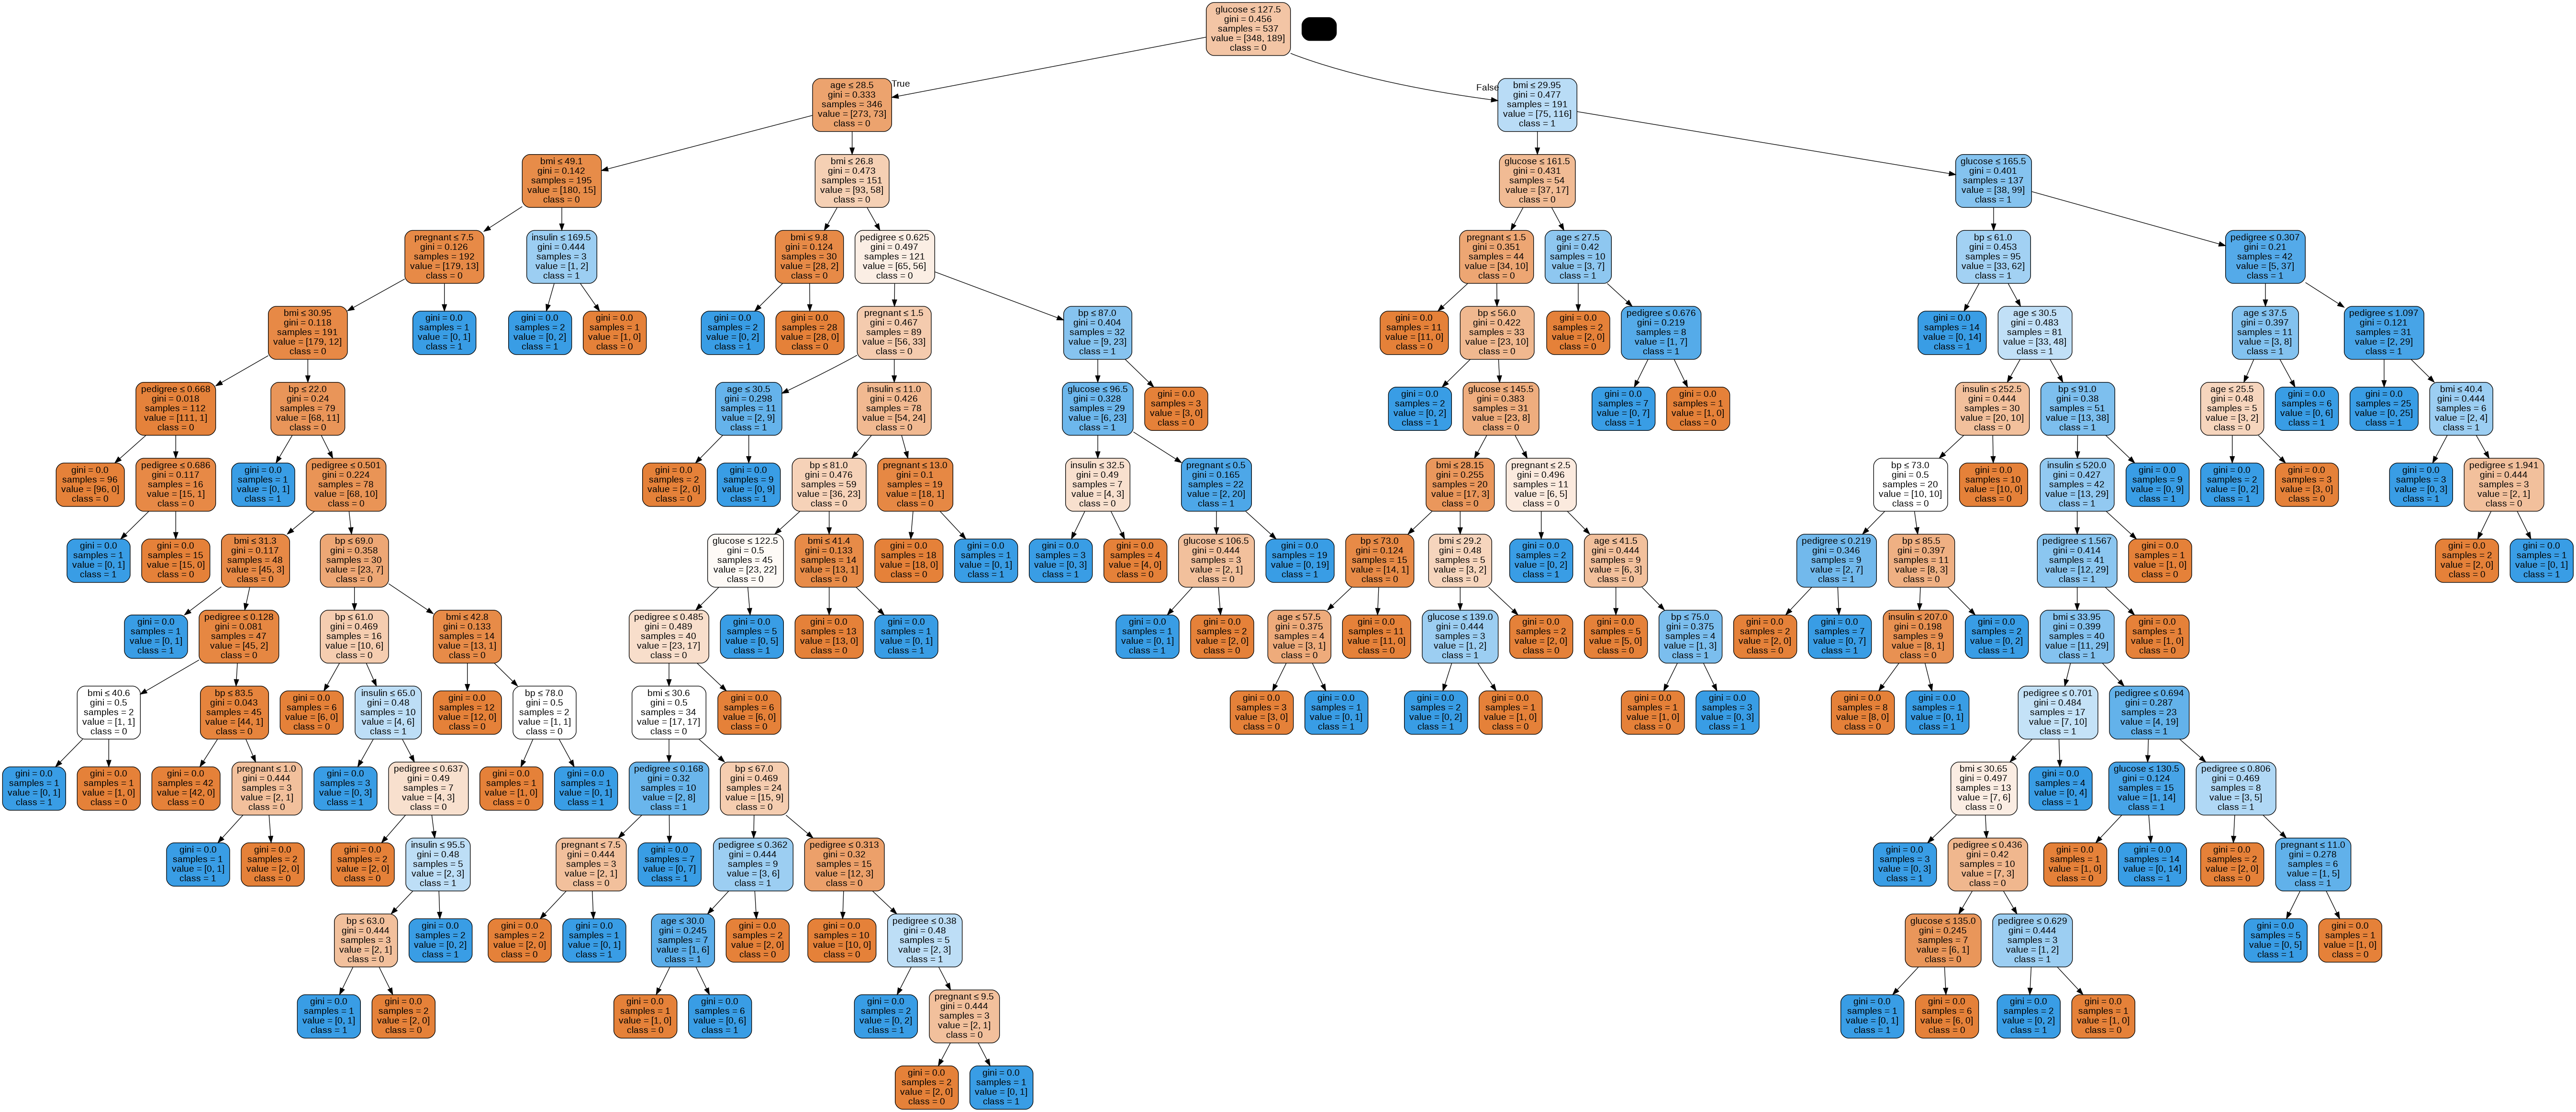

In [10]:
# Data visualization 

!pip install graphviz
!pip install pydotplus
!pip install --upgrade scikit-learn==0.20.3


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
